## Support Vector Machines (SVM) and Kernel SVM from Scratch

This notebook implements Support Vector Machines (SVM) from scratch using NumPy and "cvxopt", with a focus on understanding both the primal (hinge loss) and dual (kernelized) formulations of the algorithm.

What’s included:
- Manual implementation of linear SVM using hinge loss and gradient descent
- Custom gradient calculation and loss tracking
- Kernel SVM using quadratic programming with "cvxopt"
- Visualization of decision boundaries for both linear and kernel cases
- No use of "sklearn.svm.SVC", all logic is built from the ground up


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as cvx

### Soft margin SVM models

In [2]:
class SVM():
    def __init__(self, X_data, reg=1):
        # Initialize the parameters of the SVM model.
        self.W = np.random.randn(X_data.shape[1])
        self.w_0 = np.random.randn(1)
        self.reg = reg

    def objective_function(self, X_data, y_label):
        # Calculate the hinge loss (SVM loss function)
        distance = 1 - y_label * (X_data.dot(self.W) + self.w_0)
        distance[distance < 0] = 0.
        cost = 1/2 * self.reg * self.W.T.dot(self.W) + np.sum(distance) / X_data.shape[0]
        return cost

    def calculate_gradient(self, X_data, y_label):
        # Calculate the gradient of the hinge loss with respect to W and w_0
        distance = np.sign(1 - y_label * (X_data.dot(self.W) + self.w_0))
        distance[distance < 0] = 0.
        gradient_W = self.reg * self.W - np.sum((X_data.T * y_label * distance).T, axis=0) / X_data.shape[0]
        gradient_w_0 = -np.sum(y_label * distance, axis=0) / X_data.shape[0]
        return gradient_W, gradient_w_0

    def train(self, x_input, y_label, lr=0.01, epochs=50):
        for epoch in range(epochs):
            cost = self.objective_function(x_input, y_label)
            gradient_W, gradient_w_0 = self.calculate_gradient(x_input, y_label)
            self.W -= lr * gradient_W
            self.w_0 -= lr * gradient_w_0
            if epoch % 10 == 0:
                print(f"[Epoch {epoch + 10}/{epochs}] | Cost: {cost:.4f}")
        print("Training complete.")
        print("Learned weights:", self.W)
        print("Learned bias:", self.w_0)

    def predict(self, x_input):
        return np.sign(x_input.dot(self.W) + self.w_0)

    def accuracy(self, predict, y_label):
        return np.sum(predict == y_label) / len(predict)

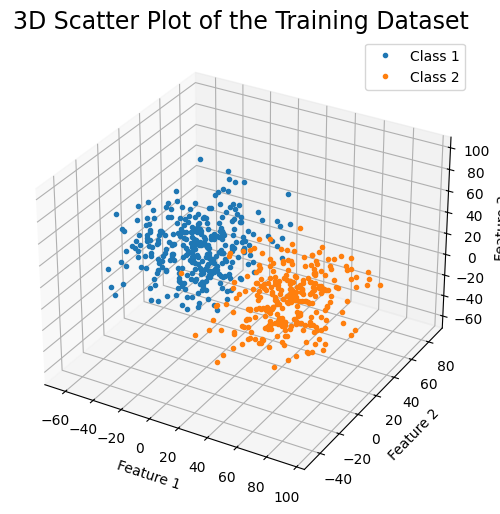

In [3]:
# Load the training, validation, and test datasets.
train = np.load("./Dataset1(Train).npy")
validation = np.load("./Dataset1(Validation).npy")
test = np.load("./Dataset1(Test).npy")

# Extract features (X) and labels (y) for each dataset.
X_train = train[:, :-1]
y_train = train[:, -1]

X_val = validation[:, :-1]
y_val = validation[:, -1]

X_test = test[:, :-1]
y_test = test[:, -1]

# Visualize the training dataset using a 3D scatter plot.
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.plot(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], X_train[:, 2][y_train == -1], '.', label="Class 1")
ax.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], X_train[:, 2][y_train == 1], '.', label="Class 2")

plt.title("3D Scatter Plot of the Training Dataset", fontsize=17)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.grid(True)

ax.legend()
plt.show()

In [4]:
# Size of each dataset.
print("The shape of the train dataset\t\t: %s\t | The shape of train label\t\t: %s"%(X_train.shape, y_train.shape))
print("The shape of the validation dataset\t: %s\t | The shape of validation label\t: %s"%(X_val.shape, y_val.shape))
print("The shape of the test dataset\t\t: %s\t | The shape of test label\t\t: %s"%(X_test.shape, y_test.shape))

The shape of the train dataset		: (600, 3)	 | The shape of train label		: (600,)
The shape of the validation dataset	: (200, 3)	 | The shape of validation label	: (200,)
The shape of the test dataset		: (200, 3)	 | The shape of test label		: (200,)


### Soft margin SVM models with different learning rates

In [5]:
np.random.seed(111)

lr = 1e-4
epochs = 100
reg = 1

train_setting = {"lr": [1e-2, 1e-3]}
models = []
for i, lr in enumerate(train_setting["lr"]):
    model = SVM(X_train, reg)
    model.train(X_train, y_train, lr=lr, epochs=epochs)

    train_predicted = model.predict(X_train)
    acc = model.accuracy(train_predicted, y_train)
    print("\n- The accuracy of the train set \t: %.3f"%acc)

    val_predicted = model.predict(X_val)
    acc = model.accuracy(val_predicted, y_val)
    print("- The accuracy of the validation set \t: %.3f"%acc)
    print("-"*50,"\n")
    models.append((model, lr))

[Epoch 10/100] | Cost: 61.6495
[Epoch 20/100] | Cost: 0.5366
[Epoch 30/100] | Cost: 0.1552
[Epoch 40/100] | Cost: 0.1263
[Epoch 50/100] | Cost: 0.1084
[Epoch 60/100] | Cost: 0.0970
[Epoch 70/100] | Cost: 0.0926
[Epoch 80/100] | Cost: 0.0920
[Epoch 90/100] | Cost: 0.0917
[Epoch 100/100] | Cost: 0.0916
Training complete.
Learned weights: [ 0.06962793  0.00328596 -0.06588681]
Learned bias: [-0.4116323]

- The accuracy of the train set 	: 0.968
- The accuracy of the validation set 	: 0.975
-------------------------------------------------- 

[Epoch 10/100] | Cost: 26.3937
[Epoch 20/100] | Cost: 15.5943
[Epoch 30/100] | Cost: 6.6364
[Epoch 40/100] | Cost: 1.9721
[Epoch 50/100] | Cost: 0.7947
[Epoch 60/100] | Cost: 0.4551
[Epoch 70/100] | Cost: 0.3598
[Epoch 80/100] | Cost: 0.3032
[Epoch 90/100] | Cost: 0.2720
[Epoch 100/100] | Cost: 0.2525
Training complete.
Learned weights: [ 0.09939067  0.02443691 -0.29424145]
Learned bias: [-0.34652683]

- The accuracy of the train set 	: 0.940
- The acc

#### Visualize a trained SVM model (idx-th) with the 3D plot

- Test set prediction accuracy: 0.95


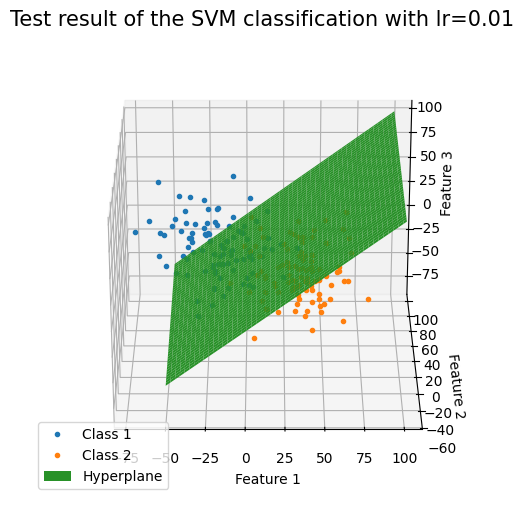

In [6]:
# Select the trained SVM model (idx-th model in the models list)
idx = 0
model = models[idx]

# Make predictions on the test set using the selected SVM model
test_predicted = model[0].predict(X_test)
acc = model[0].accuracy(test_predicted, y_test)
print("- Test set prediction accuracy:", acc)

# Define the meshgrid for the axis to visualize the hyperplane
x_axis = np.arange(-50, 100, 1)
y_axis = np.arange(-50, 100, 1)
x_axis, y_axis = np.meshgrid(x_axis, y_axis)

# Compute the hyperplane for visualization
Z = - (x_axis * model[0].W[0] + y_axis * model[0].W[1] + model[0].w_0) / model[0].W[2]

fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')

# Plot the test set data points with class labels
ax.plot(X_test[:, 0][y_test == -1], X_test[:, 1][y_test == -1], X_test[:, 2][y_test == -1], '.', label="Class 1")
ax.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], X_test[:, 2][y_test == 1], '.', label="Class 2")

label = "Hyperplane"
plane = ax.plot_surface(x_axis, y_axis, Z, label=label)
plane._facecolors2d = plane._facecolor3d
plane._edgecolors2d = plane._edgecolor3d

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.view_init(25, -90)

ax.grid()
ax.legend(loc='lower left')
plt.title("Test result of the SVM classification with lr=0.01", fontsize=15)
plt.show()

- The accuracy of prediction for the test set 	: 0.905


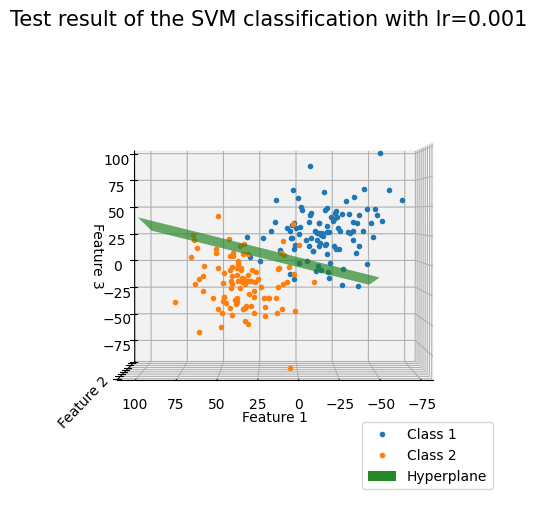

In [7]:
# Select the trained SVM model (idx-th model in the models list)
idx = 1
model = models[idx]

test_predicted = model[0].predict(X_test)
acc = model[0].accuracy(test_predicted, y_test)
print("- The accuracy of prediction for the test set \t:",acc)

# Define the meshgrid for the axis to visualize the hyperplane
x_axis = np.arange(-50, 100, 1)
y_axis = np.arange(-50, 100, 1)
x_axis, y_axis = np.meshgrid(x_axis, y_axis)

# Compute the hyperplane for visualization
Z = -(x_axis * model[0].W[0] + y_axis * model[0].W[1] + model[0].w_0) / model[0].W[2]

fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')

# Plot the test set data points with class labels
ax.plot(X_test[:, 0][y_test == -1], X_test[:, 1][y_test == -1], X_test[:, 2][y_test == -1], '.', label="Class 1")
ax.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], X_test[:, 2][y_test == 1], '.', label="Class 2")

# Visualize the hyperplane
label = "Hyperplane"
plane = ax.plot_surface(x_axis, y_axis, Z, label = label)
plane._facecolors2d = plane._facecolor3d
plane._edgecolors2d = plane._edgecolor3d

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.yaxis.set_ticklabels([])
ax.set_zlabel('Feature 3')
ax.view_init(1,90)

ax.grid()
ax.legend(loc='lower right')
plt.title("Test result of the SVM classification with lr=0.001", fontsize=15)
plt.show()

### Kernel SVM implementation based on the dual form

In [8]:
class Kernels:
    def __init__(self, poly_c=10, poly_d=2, gamma=0.001):
        self.poly_c = poly_c
        self.poly_d = poly_d
        self.gamma = gamma

    def polynomial_kernel(self, x, y, c=10, d=2):
        # Compute the polynomial kernel between two vectors
        result = (c + x.dot(y)) ** d
        return result

    def gaussian_kernel(self, x, y, gamma=0.001):
        # Gamma is the parameter 1 / (2 * sigma^2), with sigma being a free parameter
        distance_squared = np.linalg.norm(np.array(x) - np.array(y))**2
        result = np.exp(-gamma * distance_squared)
        return result

def compute_inner_matrix(X_data, kernel):
    n = X_data.shape[0]
    inner_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            inner_matrix[i, j] = kernel(X_data[i], X_data[j])
    return inner_matrix

In [9]:
class Kernel_SVM:
    def __init__(self, kernel, threshold_SV):
        self.kernel = kernel
        self.threshold_SV = threshold_SV

    def compute_lagrange(self, X_data, y_label):
        # Use cvxopt library to solve the quadratic optimization problem
        kernel_matrix = compute_inner_matrix(X_data, self.kernel)

        P = cvx.matrix(np.outer(y_label, y_label) * kernel_matrix, tc='d')
        q = cvx.matrix(-np.ones(X_data.shape[0]), tc='d')

        # Constraints: Ensure alpha is greater than or equal to zero (inequality constraint)
        G = cvx.matrix(-np.identity(X_data.shape[0]), tc='d')
        h = cvx.matrix(np.zeros(X_data.shape[0]), tc='d')

        # Equality constraint: The sum of alpha * y_label must be zero
        A = cvx.matrix(y_label, (1, X_data.shape[0]), tc='d')
        b = cvx.matrix(0.)

        alpha = np.array(cvx.solvers.qp(P, q, G, h, A, b)['x']).flatten()

        return alpha

    def train(self, X_data, y_label):
        self.alpha = self.compute_lagrange(X_data, y_label)

        # Identify support vectors based on alpha values greater than the threshold
        self.alpha_support = self.alpha[self.alpha > self.threshold_SV]
        self.support_vectors = X_data[np.argwhere(self.alpha > self.threshold_SV)].reshape(-1, X_data.shape[1])
        self.support_vectors_labels = y_label[np.argwhere(self.alpha > self.threshold_SV)]

    def predict(self, x_data):
        y_pred = []
        pred = []  # Model outputs (before applying sign function)

        for i in range(x_data.shape[0]):
            self.bias = 0
            # Compute the bias term based on the support vectors
            for (alpha, x_, y_) in zip(self.alpha_support, self.support_vectors, self.support_vectors_labels):
                self.bias += y_
                self.bias -= np.sum(alpha * y_ * self.kernel(x_, x_data[i]))
            self.bias /= len(self.alpha_support)

            # Compute the decision function value for prediction
            output = self.bias
            for (alpha, x_, y_) in zip(self.alpha_support, self.support_vectors, self.support_vectors_labels):
                output += alpha * y_ * self.kernel(x_, x_data[i])

            y_pred.extend(np.sign(output))
            pred.extend(output)

        return y_pred, pred

    def accuracy(self, predict, y_label):
        return np.sum(predict == y_label) / len(predict)

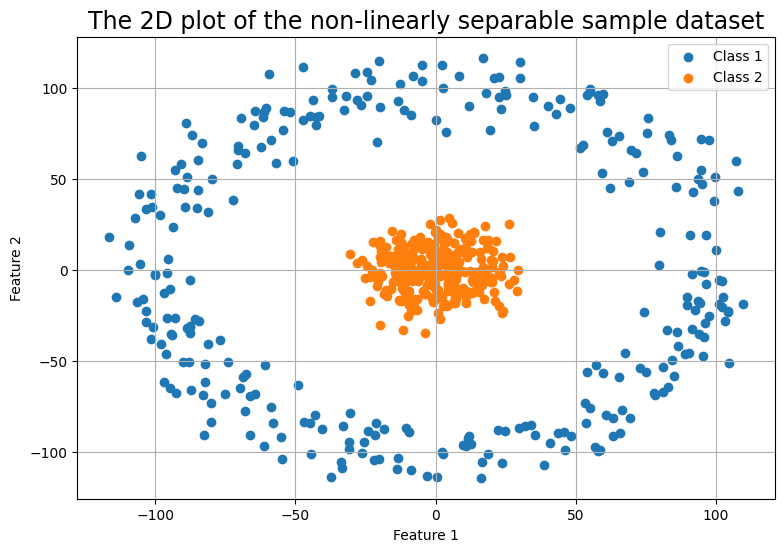

In [10]:
# Load the train, validation, test dataset.
train = np.load("./Dataset2(Train).npy")
validation = np.load("./Dataset2(Validation).npy")
test = np.load("./Dataset2(Test).npy")

# Set the X, y data for each dataset.
X_train = train[:, :-1]
y_train = train[:, -1]
X_val = validation[:, :-1]
y_val = validation[:, -1]
X_test = test[:, :-1]
y_test = test[:, -1]

# Visualize the train dataset.
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot(111)
ax.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], label="Class 1")
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label="Class 2")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.title("The 2D plot of the non-linearly separable sample dataset", fontsize=17)
plt.grid()
plt.legend()
plt.show()

In [11]:
# Size of each dataset.
print("The shape of the train dataset\t\t: %s\t | The shape of train label\t\t: %s"%(X_train.shape, y_train.shape))
print("The shape of the validation dataset\t: %s\t | The shape of validation label\t: %s"%(X_val.shape, y_val.shape))
print("The shape of the test dataset\t\t: %s\t | The shape of test label\t\t: %s"%(X_test.shape, y_test.shape))

The shape of the train dataset		: (600, 2)	 | The shape of train label		: (600,)
The shape of the validation dataset	: (200, 2)	 | The shape of validation label	: (200,)
The shape of the test dataset		: (200, 2)	 | The shape of test label		: (200,)


#### Gaussian Kernel SVM model with the different hyperparameters.

In [13]:
# Set hyperparameters for the Gaussian kernel
gamma = 0.001

utils_ = Kernels(gamma=gamma)
kernel = utils_.gaussian_kernel

Gaussian_kernel = Kernel_SVM(kernel=kernel, threshold_SV=10**(-3))
Gaussian_kernel.train(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -5.4159e+00 -1.7244e+01  8e+02  2e+01  1e+00
 1: -5.3661e-01 -2.0186e+01  6e+01  1e+00  7e-02
 2: -3.0853e+00 -1.1926e+01  1e+01  2e-01  9e-03
 3: -4.7008e+00 -7.5822e+00  3e+00  3e-02  2e-03
 4: -5.3353e+00 -6.3588e+00  1e+00  3e-03  2e-04
 5: -5.7337e+00 -6.0531e+00  3e-01  7e-05  4e-06
 6: -5.8788e+00 -5.9579e+00  8e-02  3e-16  6e-16
 7: -5.9185e+00 -5.9427e+00  2e-02  3e-16  6e-16
 8: -5.9360e+00 -5.9390e+00  3e-03  6e-16  7e-16
 9: -5.9385e+00 -5.9386e+00  9e-05  2e-16  7e-16
10: -5.9386e+00 -5.9386e+00  4e-06  4e-16  7e-16
Optimal solution found.


#### Evaluate the Gaussian Kernel SVM model

In [14]:
train_predicted, pred = Gaussian_kernel.predict(X_train)
acc = Gaussian_kernel.accuracy(train_predicted, y_train)
print("- The accuracy of prediction for the train set \t\t:",acc)

val_predicted, pred = Gaussian_kernel.predict(X_val)
acc = Gaussian_kernel.accuracy(val_predicted, y_val)
print("- The accuracy of prediction for the validation set \t:",acc)

- The accuracy of prediction for the train set 		: 1.0
- The accuracy of prediction for the validation set 	: 1.0


#### Visualize the result of the Gaussian Kernel SVM classification

- The accuracy of prediction for the test set 	: 1.0


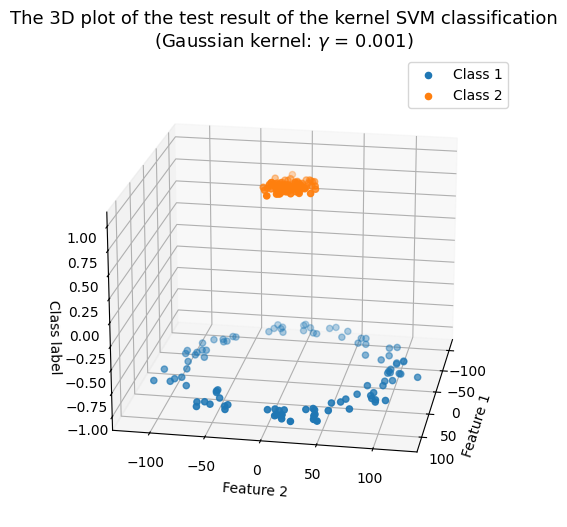

In [15]:
from matplotlib import cm
Z, _ = Gaussian_kernel.predict(X_test)
acc = Gaussian_kernel.accuracy(Z, y_test)
print("- The accuracy of prediction for the test set \t:",acc)
Z = np.array(Z)
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], Z[y_test == -1], label="Class 1")
ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], Z[y_test == 1], label="Class 2")

plt.title("The 3D plot of the test result of the kernel SVM classification\n(Gaussian kernel: $\gamma$ = 0.001)", fontsize=13)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Class label')
ax.view_init(20,10)
ax.grid()
ax.legend()
plt.show()

In [17]:
# Set hyperparameters for the polynomial kernel
poly_c = 10
poly_d = 2

utils_ = Kernels(poly_c=poly_c, poly_d=poly_d)
kernel = utils_.polynomial_kernel

Polynomial_kernel = Kernel_SVM(kernel=kernel, threshold_SV=10**(-10))
Polynomial_kernel.train(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -4.5242e+01 -9.0694e+01  2e+03  5e+01  2e+00
 1: -5.0317e+01 -3.4769e+01  8e+02  2e+01  7e-01
 2: -2.3754e+01 -7.2496e+00  4e+02  7e+00  3e-01
 3: -1.9934e+00 -3.5576e-02  3e+01  4e-01  2e-02
 4: -2.0058e-02 -4.4343e-06  3e-01  4e-03  2e-04
 5: -2.0246e-04 -8.2978e-07  3e-03  4e-05  2e-06
 6: -3.8333e-06 -8.1200e-07  5e-05  8e-07  4e-08
 7: -6.2204e-07 -6.2697e-07  1e-05  1e-07  6e-09
 8:  8.5374e-08 -5.0263e-07  6e-07  2e-22  1e-14
 9: -9.5099e-08 -2.1198e-07  1e-07  1e-22  3e-15
10: -1.2504e-07 -2.4074e-07  1e-07  1e-22  3e-15
11: -1.9125e-07 -2.0848e-07  2e-08  4e-23  3e-15
Optimal solution found.


In [18]:
train_predicted, pred = Polynomial_kernel.predict(X_train)
acc = Polynomial_kernel.accuracy(train_predicted, y_train)
print("- The accuracy of prediction for the train set \t\t:",acc)

val_predicted, pred = Polynomial_kernel.predict(X_val)
acc = Polynomial_kernel.accuracy(val_predicted, y_val)
print("- The accuracy of prediction for the validation set \t:",acc)

- The accuracy of prediction for the train set 		: 1.0
- The accuracy of prediction for the validation set 	: 1.0


- The accuracy of prediction for the test set 	: 1.0


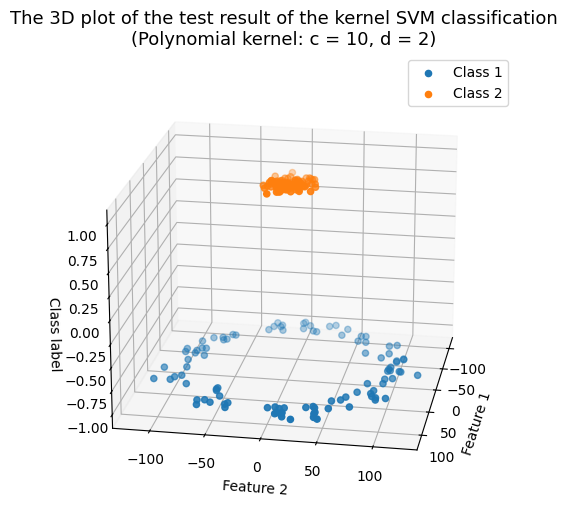

In [19]:
Z, _ = Polynomial_kernel.predict(X_test)
acc = Polynomial_kernel.accuracy(Z, y_test)
print("- The accuracy of prediction for the test set \t:",acc)
Z = np.array(Z)
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], Z[y_test == -1], label="Class 1")
ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], Z[y_test == 1], label="Class 2")

plt.title("The 3D plot of the test result of the kernel SVM classification\n(Polynomial kernel: c = 10, d = 2)", fontsize=13)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Class label')
ax.view_init(20, 10)
ax.grid()
ax.legend()
plt.show()

### Conclusion

Key learnings:
- The primal SVM with hinge loss can be optimized via gradient descent, but it’s sensitive to the regularization parameter.
- The dual formulation allows for kernel methods, enabling non-linear decision boundaries.
- "cvxopt" is a powerful tool for solving QP problems, but it requires careful matrix setup and constraints.
- Visualizing the margin and support vectors helps build intuition for how SVMs separate classes.

